<a href="https://colab.research.google.com/github/tchan623/fall2022/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**The Impact of Course Average GPA on Professor Reviews**

##Introduction:

Planetterp is a website designed for students of the University of Maryland to leave feedback and reviews of their experience with a specific class or instructors. The website contains professors, classes, descriptions, reviews,  and course grades/average GPAs correlated to those classes. The statistics from this website is obtained through the UMD office of Institutional Reasearch Planning/Assessment.

This tutorial displays how to retrieve data from PlanetTerp using its API along with a variety of different data manipulation/analyzation, by using the tools and libraries provided below. One can see an overview of different courses offered at University of Maryland and their concluding grades and other statistics. The data is then manipulated to show the total count of entries and its correlation to the average rating of the professor, average grade letter distribution, and average grade point average. Then the data is confined and repeated to courses of the computer science department and Kinesiology department. A two sample t test was then run to calculate the average GPAs for CMSC and KNES courses. Scatterplots were then made for a visual correlation between average GPAs and average ratings for CMSC and KNES courses.

**Tools and Libraries**:




*   Requests: https://requests.readthedocs.io/en/latest/
    
    *Requests is a library in Python created in the early 2010s that creates a user-friendly way to extract information from HTTP websites. The requests.get function found in this tutorial is used commonly to retrieve the data from the provided websites. The receiving end (commonly seen as the "response" variable) has mulitple functions and contains lots of information extracted from the HTTP. More functions and information can be found in the website linked above.*

*   Pandas: https://pandas.pydata.org/docs/user_guide/index.html#user-guide

    *Python Pandas is a extremely useful data analysis/manipulation and documentation tool released in the late 2000s. The storage of data and analysis done in this tutorial is mainly done with Pandas. The user guide linked above provides documentation of functions and uses of pandas.*

*   Time: https://docs.python.org/3/library/time.html
    *The time toolbox is a useful function that is used in this tutorial to configure for loops. More functions can be found in the link above. *

*   Numpy: https://numpy.org/doc/stable/user/quickstart.html
    *Numpy is essentially an array. Used for storing data, mathmatical functions, and matrix operations. More information can be found in the link above.*

*   Matplotlib: https://matplotlib.org/stable/api/index
    *Matplotlib is ython's plotting library consisting of a variety of plotting methods. The most common one is pyplot and it creates a very basic line/dot plot on a coordinate plane. More advanced plotting methods are discussed in the link above.*

*   Scipy:  https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide
    *A powerful open source statistical computation library that is later used in this tutorial to run a two sample t test. More information can be found in the user guide linked above.*



In [ ]:
#get df for all courses
import requests
import pandas as pd
import time

all_courses_df = pd.DataFrame()

base_url = 'https://api.planetterp.com/v1'
response = requests.get(base_url + "/courses?&reviews=true")
data = response.json()
all_courses_df = pd.DataFrame.from_dict(data)

for i in range (1, 113):
  r = "/courses?&reviews=true&offset=" + str(i) + "00"
  response = requests.get(base_url + r)
  data = response.json()
  temp = pd.DataFrame.from_dict(data)
  all_courses_df = pd.concat([all_courses_df, temp])
  time.sleep(0.1)

all_courses_df

all_courses_df.to_csv('all_courses.csv')

In [ ]:
#get df for all professors
prof_df = pd.DataFrame()

api_url = 'https://api.planetterp.com/v1'
response = requests.get(api_url + "/professors?type=professor&reviews=true")
data = response.json()
prof_df = pd.DataFrame.from_dict(data)

for i in range (1, 117):
  r = "/professors?type=professor&reviews=true&offset=" + str(i) + "00"
  response = requests.get(api_url + r)
  data = response.json()
  temp = pd.DataFrame.from_dict(data)
  prof_df = pd.concat([prof_df, temp])
  time.sleep(0.1)

prof_df

prof_df.to_csv('professors_data.csv')

In [ ]:
#clean all_courses df to prepare for grades_df

all_courses_df = pd.read_csv('all_courses.csv', na_filter=True, na_values='[]', index_col=0)

#drop rows with no average_gpa or reviews 
all_courses_df = all_courses_df.loc[all_courses_df["average_gpa"] == all_courses_df["average_gpa"]]
all_courses_df = all_courses_df.loc[all_courses_df["reviews"] == all_courses_df["reviews"]]

all_courses_df

,average_gpa,professors,reviews,department,course_number,name,title,credits,description,is_recent
2,3.407091,"['Qin Wang', 'Abani Pradhan', 'Solmaz Alborzi'...","[{'professor': 'Shraddha Karanth', 'course': '...",NFSC,112,NFSC112,Food: Science and Technology,3.0,"Introduction to the realm of food science, foo...",True
4,2.300000,"['Emily Perez', 'Laura Williams', 'Douglas Ker...","[{'professor': 'Zita Nunes', 'course': 'AASP29...",AASP,298L,AASP298L,African-American Literature and Culture,3.0,<b>Cross-listed with:</b> ENGL234.\n<b>Credit ...,True
5,3.530045,"['Justin Lohr', 'Sarah Pleydell', 'Catherine B...","[{'professor': 'Justin Lohr', 'course': 'ENGL1...",ENGL,101H,ENGL101H,Academic Writing,3.0,<b>Additional information:</b> Any student who...,True
6,2.839834,"['Douglas Kern', 'Zita Nunes', 'Mary Washingto...","[{'professor': 'Zita Nunes', 'course': 'ENGL23...",ENGL,234,ENGL234,African-American Literature and Culture,3.0,<b>Cross-listed with:</b> AASP298L.\n<b>Credit...,True
8,3.625573,"['Guangming Zhang', 'Peter Chung', 'Abhijit Da...","[{'professor': 'Guangming Zhang', 'course': 'E...",ENME,470,ENME470,Finite Element Analysis,3.0,<b>Restriction:</b> Senior standing; and permi...,True
...,...,...,...,...,...,...,...,...,...,...
60,2.927083,"['Erin Mosely', 'Erin Mosely', 'Dennis Doster']","[{'professor': 'Erin Mosely', 'course': 'HIST3...",HIST,319F,HIST319F,Special Topics in History; Modern African Hist...,3.0,"<i>Approaches film, literature, and music as i...",True
57,3.714706,['Andrew Ferguson'],"[{'professor': 'Andrew Ferguson', 'course': 'E...",ENGL,378E,ENGL378E,Special Topics in English; Videogames and Game...,3.0,<i>Students are encouraged to bring laptops to...,True
65,3.543103,"['Brooke Auxier', 'Courtney Douglass', 'James ...","[{'professor': 'Courtney Douglass', 'course': ...",INST,152,INST152,"""Fake Checking"": Battling Misinformation and D...",3.0,"Examining the phenomenon of ""fake news"" using ...",True
84,3.635096,"['Eugene Cantor', 'Samuel Handwerger', 'Samuel...","[{'professor': 'Samuel Handwerger', 'course': ...",BUAC,712,BUAC712,Business Communications for Accountants and Au...,2.0,<b>Restriction:</b> Must be in Business and Ma...,True


In [ ]:
#clean professors df to prepare for grades_df

prof_df = pd.read_csv('professors_data.csv', na_filter=True, na_values='[]', index_col=0)

#drop rows with no average_rating or reviews
prof_df = prof_df.loc[prof_df["courses"] == prof_df["courses"]]
prof_df = prof_df.loc[prof_df["average_rating"] == prof_df["average_rating"]]
prof_df = prof_df.loc[prof_df["reviews"] == prof_df["reviews"]]

prof_df

,courses,average_rating,type,reviews,name,slug
3,"['NFSC431', 'NFSC679R', 'NFSC112', 'HLTH672', ...",5.0000,professor,"[{'professor': 'Abani Pradhan', 'course': None...",Abani Pradhan,pradhan
6,"['ENME674', 'ENMA300', 'ENME684', 'ENME489Z', ...",4.3333,professor,"[{'professor': 'Abhijit Dasgupta', 'course': '...",Abhijit Dasgupta,dasgupta_abhijit
8,"['ARTH389L', 'ARTH255', 'ARTH768', 'ARTH668A',...",2.8333,professor,"[{'professor': 'Abigail McEwen', 'course': Non...",Abigail McEwen,mcewen
11,"['PHYS405', 'PHYS275', 'PHYS758E', 'PHYS273', ...",4.3333,professor,"[{'professor': 'Abolhassan Jawahery', 'course'...",Abolhassan Jawahery,jawahery
12,"['STAT701', 'STAT700', 'STAT750', 'STAT650', '...",2.7000,professor,"[{'professor': 'Abram Kagan', 'course': 'STAT4...",Abram Kagan,kagan
...,...,...,...,...,...,...
30,['UNIV100'],5.0000,professor,"[{'professor': 'Alana Ebert-zavos', 'course': ...",Alana Ebert-zavos,ebert-zavos_alana
35,['UNIV100'],5.0000,professor,"[{'professor': 'Alyssa Orlando', 'course': 'UN...",Alyssa Orlando,orlando_alyssa
51,['ANTH260'],5.0000,professor,"[{'professor': 'Aryn Schriner', 'course': 'ANT...",Aryn Schriner,schriner_aryn
62,['BSCI238G'],5.0000,professor,"[{'professor': 'Spencer Chan', 'course': 'BSCI...",Spencer Chan,chan_spencer


In [ ]:
#use courses and professors to append grades
grades_df = pd.DataFrame()

for i in prof_df['name']:
  api_url = 'https://api.planetterp.com/v1'
  response = requests.get(api_url + "/grades?professor=" + i)
  data = response.json()
  temp = pd.DataFrame.from_dict(data)
  grades_df = grades_df.append(temp)
  time.sleep(0.1)

grades_df

grades_df.to_csv('grades_df.csv')

In [ ]:
#display grades data
grades_df = pd.read_csv('grades_df.csv', na_filter=True, na_values='[]', index_col=0)
# grades_df.drop(grades_df[((grades_df['A+'] == 0) & (grades_df['A'] == 0) & (grades_df['A-'] == 0) & (grades_df['B+'] == 0) & 
#                          (grades_df['B'] == 0) & (grades_df['B-'] == 0) & (grades_df['C+'] == 0) & (grades_df['C'] == 0) & 
#                          (grades_df['C-'] == 0) & (grades_df['D+'] == 0) & (grades_df['D'] == 0) & (grades_df['D-'] == 0) & 
#                          (grades_df['F'] == 0))].index, inplace=True)

grades_df

,course,professor,semester,section,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Other
0,NFSC431,Abani Pradhan,201201,0101,0,10,0,0,3,0,0,0,0,0,0,0,0,1,0
1,NFSC679R,Abani Pradhan,201208,0101,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NFSC431,Abani Pradhan,201301,0101,4,8,2,5,2,2,0,0,0,0,0,0,0,0,0
3,NFSC679R,Abani Pradhan,201308,0101,1,3,2,0,0,0,0,0,0,0,0,0,0,0,0
4,NFSC431,Abani Pradhan,201401,0101,4,5,2,3,3,2,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,LARC151,Deni Ruggeri,202201,0104,8,7,2,1,0,1,0,0,0,0,0,0,1,0,0
4,LARC720,Deni Ruggeri,202201,0101,1,2,1,0,0,0,0,0,0,0,0,0,1,0,0
0,PLCY388A,Brandi Slaughter,202201,0101,14,2,1,0,0,0,0,1,1,0,0,0,1,1,1
1,PLCY388A,Brandi Slaughter,202201,0201,7,0,5,3,0,1,1,0,0,0,0,0,0,0,0


In [ ]:
all_courses_df.head(5)

,average_gpa,professors,reviews,department,course_number,name,title,credits,description,is_recent
2,3.407091,"['Qin Wang', 'Abani Pradhan', 'Solmaz Alborzi'...","[{'professor': 'Shraddha Karanth', 'course': '...",NFSC,112,NFSC112,Food: Science and Technology,3.0,"Introduction to the realm of food science, foo...",True
4,2.300000,"['Emily Perez', 'Laura Williams', 'Douglas Ker...","[{'professor': 'Zita Nunes', 'course': 'AASP29...",AASP,298L,AASP298L,African-American Literature and Culture,3.0,<b>Cross-listed with:</b> ENGL234.\n<b>Credit ...,True
5,3.530045,"['Justin Lohr', 'Sarah Pleydell', 'Catherine B...","[{'professor': 'Justin Lohr', 'course': 'ENGL1...",ENGL,101H,ENGL101H,Academic Writing,3.0,<b>Additional information:</b> Any student who...,True
6,2.839834,"['Douglas Kern', 'Zita Nunes', 'Mary Washingto...","[{'professor': 'Zita Nunes', 'course': 'ENGL23...",ENGL,234,ENGL234,African-American Literature and Culture,3.0,<b>Cross-listed with:</b> AASP298L.\n<b>Credit...,True
8,3.625573,"['Guangming Zhang', 'Peter Chung', 'Abhijit Da...","[{'professor': 'Guangming Zhang', 'course': 'E...",ENME,470,ENME470,Finite Element Analysis,3.0,<b>Restriction:</b> Senior standing; and permi...,True


In [ ]:
prof_df.head(5)

,courses,average_rating,type,reviews,name,slug
3,"['NFSC431', 'NFSC679R', 'NFSC112', 'HLTH672', ...",5.0000,professor,"[{'professor': 'Abani Pradhan', 'course': None...",Abani Pradhan,pradhan
6,"['ENME674', 'ENMA300', 'ENME684', 'ENME489Z', ...",4.3333,professor,"[{'professor': 'Abhijit Dasgupta', 'course': '...",Abhijit Dasgupta,dasgupta_abhijit
8,"['ARTH389L', 'ARTH255', 'ARTH768', 'ARTH668A',...",2.8333,professor,"[{'professor': 'Abigail McEwen', 'course': Non...",Abigail McEwen,mcewen
11,"['PHYS405', 'PHYS275', 'PHYS758E', 'PHYS273', ...",4.3333,professor,"[{'professor': 'Abolhassan Jawahery', 'course'...",Abolhassan Jawahery,jawahery
12,"['STAT701', 'STAT700', 'STAT750', 'STAT650', '...",2.7000,professor,"[{'professor': 'Abram Kagan', 'course': 'STAT4...",Abram Kagan,kagan


In [ ]:
grades_df.head(5)

,course,professor,semester,section,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Other
0,NFSC431,Abani Pradhan,201201,0101,0,10,0,0,3,0,0,0,0,0,0,0,0,1,0
1,NFSC679R,Abani Pradhan,201208,0101,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NFSC431,Abani Pradhan,201301,0101,4,8,2,5,2,2,0,0,0,0,0,0,0,0,0
3,NFSC679R,Abani Pradhan,201308,0101,1,3,2,0,0,0,0,0,0,0,0,0,0,0,0
4,NFSC431,Abani Pradhan,201401,0101,4,5,2,3,3,2,1,0,0,0,1,0,0,1,0


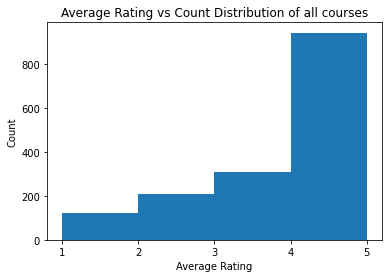

In [ ]:
#average rating vs count distribution
from matplotlib import pyplot as plt
import numpy as np

index = np.asarray([i for i in range(1, 6)])

plt.hist(prof_df["average_rating"], bins=4)
plt.xticks(index)
plt.title("Average Rating vs Count Distribution of all courses")
plt.xlabel("Average Rating")
plt.ylabel("Count")

plt.show()

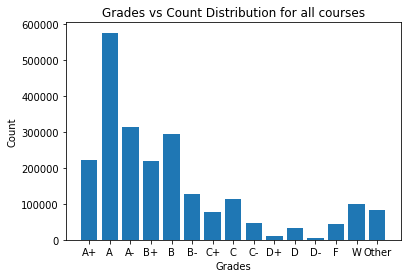

In [ ]:
#count total for each letter grade

grade_counts = {grade: grades_df[grade].sum() for grade in ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F', 'W', 'Other']}

x = list(grade_counts.keys())
y = list(grade_counts.values())

plt.bar(x, y)
plt.title("Grades vs Count Distribution for all courses")
plt.xlabel("Grades")
plt.ylabel("Count")

plt.show()

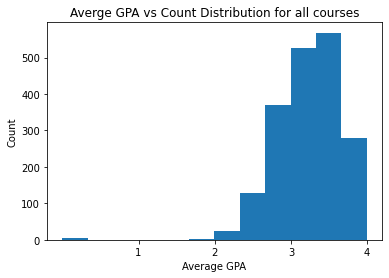

In [ ]:
#average gpa for each course vs count of that gpa

index = np.asarray([i for i in range(1, 5)])

plt.hist(all_courses_df["average_gpa"], bins=12)
plt.xticks(index)
plt.title("Averge GPA vs Count Distribution for all courses")
plt.xlabel("Average GPA")
plt.ylabel("Count")

plt.show()

In [ ]:
#create cmsc_courses_df from all_courses_df
cmsc_courses_df = all_courses_df
cmsc_courses_df = cmsc_courses_df.loc[cmsc_courses_df["department"] == "CMSC"]
cmsc_courses_df

,average_gpa,professors,reviews,department,course_number,name,title,credits,description,is_recent
26,3.199664,"['Atif Memon', 'Adam Porter', 'Charles Song', ...","[{'professor': 'Adam Porter', 'course': 'CMSC4...",CMSC,436,CMSC436,Programming Handheld Systems,3.0,<b>Prerequisite:</b> Minimum grade of C- in CM...,True
79,2.672616,"['Amol Deshpande', 'Nicholas Roussopoulos', 'P...","[{'professor': 'Amol Deshpande', 'course': 'CM...",CMSC,424,CMSC424,Database Design,3.0,<b>Prerequisite:</b> Minimum grade of C- in CM...,True
92,3.461364,"['Charles Kassir', 'Amy Vaillancourt', 'Alyssa...","[{'professor': 'Corie Brown', 'course': 'CMSC1...",CMSC,100,CMSC100,Bits and Bytes of Computer and Information Sci...,1.0,<b>Restriction:</b> For first time freshmen an...,True
16,2.449417,"['Alan Sussman', 'Larry Herman', 'Neil Spring'...","[{'professor': 'Nelson Padua-Perez', 'course':...",CMSC,216,CMSC216,Introduction to Computer Systems,4.0,<b>Prerequisite:</b> Minimum grade of C- in CM...,True
17,2.746843,"['Chau-Wen Tseng', 'Larry Herman', 'Dave Levin...","[{'professor': 'Jeffrey Foster', 'course': 'CM...",CMSC,330,CMSC330,Organization of Programming Languages,3.0,<b>Prerequisite:</b> Minimum grade of C- in CM...,True
47,2.380112,"['Ashok Agrawala', 'Samrat Bhattacharjee', 'Ne...","[{'professor': 'Ashok Agrawala', 'course': 'CM...",CMSC,417,CMSC417,Computer Networks,3.0,<b>Prerequisite:</b> Minimum grade of C- in CM...,True
68,2.584963,"['Michelle Hugue', 'Clyde Kruskal', 'Thomas Re...","[{'professor': 'John Aloimonos', 'course': 'CM...",CMSC,250,CMSC250,Discrete Structures,4.0,<b>Prerequisite:</b> Minimum grade of C- in CM...,True
69,2.386852,"['Hector Corrada Bravo', 'Mohammad Hajiaghayi'...","[{'professor': 'Michelle Hugue', 'course': 'CM...",CMSC,351,CMSC351,Algorithms,3.0,<b>Prerequisite:</b> Minimum grade of C- in CM...,True
29,3.014400,"['Hal Daume', 'Dana Nau', 'Donald Perlis', 'Li...","[{'professor': 'Hal Daume', 'course': 'CMSC421...",CMSC,421,CMSC421,Introduction to Artificial Intelligence,3.0,<b>Prerequisite:</b> Minimum grade of C- in CM...,True
24,2.746742,"['Clyde Kruskal', 'David Mount', 'Jessica Chan...","[{'professor': 'Samir Khuller', 'course': 'CMS...",CMSC,451,CMSC451,Design and Analysis of Computer Algorithms,3.0,<b>Prerequisite:</b> Minimum grade of C- in CM...,True


In [ ]:
#create cmsc_prof_df from prof_df

cmsc_prof = []
cmsc_prof_df = pd.DataFrame()
for index, row in prof_df.iterrows():
    if "CMSC" in row['courses']:
      cmsc_prof.append(row)

cmsc_prof_df = pd.DataFrame(cmsc_prof, columns=prof_df.columns)
cmsc_prof_df

,courses,average_rating,type,reviews,name,slug
17,"['CMSC433', 'CMSC436', 'CMSC798', 'CMSC436', '...",2.5000,professor,"[{'professor': 'Adam Porter', 'course': 'CMSC4...",Adam Porter,porter_adam
52,"['ENEE627', 'ENEE322H', 'ENEE620', 'ENEE626', ...",2.8750,professor,"[{'professor': 'Alexander Barg', 'course': 'EN...",Alexander Barg,barg
17,"['CMSC424', 'CMSC724', 'CMSC498O', 'CMSC641', ...",2.8889,professor,"[{'professor': 'Amol Deshpande', 'course': 'CM...",Amol Deshpande,deshpande
26,"['GEMS297', 'CMSC651', 'GEMS396', 'GEMS397', '...",3.6250,professor,"[{'professor': 'Aravind Srinivasan', 'course':...",Aravind Srinivasan,srinivasan
50,"['CMSC417', 'CMSC818G', 'ENES603', 'GEMS296', ...",1.9000,professor,"[{'professor': 'Ashok Agrawala', 'course': 'CM...",Ashok Agrawala,agrawala
...,...,...,...,...,...,...
58,['CMSC351'],5.0000,professor,"[{'professor': 'Erika Melder', 'course': None,...",Erika Melder,melder_erika
84,"['CMSC100', 'INST101', 'CMSC100', 'INST101']",4.0000,professor,"[{'professor': 'Charlotte Avery', 'course': 'C...",Charlotte Avery,avery_charlotte
91,"['CMSC411', 'CMSC818J']",5.0000,professor,"[{'professor': 'Bahar Asgari', 'course': 'CMSC...",Bahar Asgari,asgari_bahar
5,"['CMSC216', 'CMSC351', 'CMSC351', 'CMSC436']",4.3333,professor,"[{'professor': 'Herve Franceschi', 'course': '...",Herve Franceschi,franceschi_herve


In [ ]:
cmsc_prof_df["review_count"] = cmsc_prof_df["reviews"].apply(lambda x: len(x))
avg = cmsc_prof_df["average_rating"].median()

# add a dummy reviews with the average rating and get the new average rating
cmsc_prof_df["bayesian_avg"] = (cmsc_prof_df["average_rating"] * cmsc_prof_df["review_count"] + avg) / (cmsc_prof_df["review_count"] + 1)
cmsc_prof_df

,courses,average_rating,type,reviews,name,slug,rating_count,review_count,bayesian_avg
17,"['CMSC433', 'CMSC436', 'CMSC798', 'CMSC436', '...",2.5000,professor,"[{'professor': 'Adam Porter', 'course': 'CMSC4...",Adam Porter,porter_adam,12141,12141,2.500096
52,"['ENEE627', 'ENEE322H', 'ENEE620', 'ENEE626', ...",2.8750,professor,"[{'professor': 'Alexander Barg', 'course': 'EN...",Alexander Barg,barg,5788,5788,2.875137
17,"['CMSC424', 'CMSC724', 'CMSC498O', 'CMSC641', ...",2.8889,professor,"[{'professor': 'Amol Deshpande', 'course': 'CM...",Amol Deshpande,deshpande,28679,28679,2.888927
53,"['CMSC858K', 'CMSC451', 'CMSC858Q', 'CMSC798',...",4.7500,professor,"[{'professor': 'Andrew Childs', 'course': 'CMS...",Andrew Childs,childs,8429,8429,4.749871
8,"['ENAE380', 'CMSC106', 'ENAE380']",2.7500,professor,"[{'professor': 'Anthony Banes', 'course': 'ENA...",Anthony Banes,banes,3622,3622,2.750253
...,...,...,...,...,...,...,...,...,...
84,"['CMSC100', 'INST101', 'CMSC100', 'INST101']",4.0000,professor,"[{'professor': 'Charlotte Avery', 'course': 'C...",Charlotte Avery,avery_charlotte,386,386,3.999139
91,"['CMSC411', 'CMSC818J']",5.0000,professor,"[{'professor': 'Bahar Asgari', 'course': 'CMSC...",Bahar Asgari,asgari_bahar,3868,3868,4.999655
5,"['CMSC216', 'CMSC351', 'CMSC351', 'CMSC436']",4.3333,professor,"[{'professor': 'Herve Franceschi', 'course': '...",Herve Franceschi,franceschi_herve,1754,1754,4.332920
7,"['CMSC250', 'CMSC250']",3.6667,professor,"[{'professor': 'Paul Kline', 'course': 'CMSC25...",Paul Kline,kline_paul,3029,3029,3.666700


In [ ]:
#create cmsc_grades_df for grades only in cmsc department
cmsc_grades = []
cmsc_grades_df = pd.DataFrame()
for g, row in grades_df.iterrows():
    if row['course'].startswith('CMSC'):
      cmsc_grades.append(row)

cmsc_grades_df = pd.DataFrame(cmsc_grades, columns=grades_df.columns)
cmsc_grades_df

,course,professor,semester,section,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Other
0,CMSC433,Adam Porter,201201,0201,0,10,0,0,17,1,0,11,0,0,2,0,1,1,0
1,CMSC436,Adam Porter,201308,0101,0,10,7,8,17,6,0,1,0,0,0,0,1,0,0
2,CMSC433,Adam Porter,201401,0201,0,23,0,0,12,0,0,11,0,0,1,0,0,2,1
3,CMSC436,Adam Porter,201408,0101,0,20,0,0,21,0,0,7,0,0,1,0,0,2,0
4,CMSC433,Adam Porter,201501,0101,0,17,0,0,15,0,0,8,0,0,2,0,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,CMSC657,Daniel Gottesman,202108,0101,4,15,3,2,7,0,0,0,0,0,0,0,1,4,4
1,CMSC433,Liyi Li,202201,0101,23,44,11,15,17,19,9,19,12,0,1,0,6,15,2
0,CMSC351,Erika Melder,202201,0101,4,19,15,17,72,31,17,59,19,2,10,2,8,6,0
1,CMSC351,Erika Melder,202201,0201,3,14,5,6,41,14,12,33,4,2,4,0,1,7,1


In [ ]:
#create knes_courses_df from all_courses_df
knes_courses_df = all_courses_df
knes_courses_df = knes_courses_df.loc[knes_courses_df["department"] == "KNES"]
knes_courses_df

,average_gpa,professors,reviews,department,course_number,name,title,credits,description,is_recent
18,3.262241,"['James Hagberg', 'Jane Clark', 'Eva Chin', 'J...","[{'professor': 'Stephen McDaniel', 'course': '...",KNES,497,KNES497,Kinesiology Senior Seminar,3.0,<b>Prerequisite:</b> A professional writing co...,True
99,3.604040,"['Andrea Romeo', 'Jo Zimmerman', 'Ana Palla-Ka...","[{'professor': 'Andrew Ginsberg', 'course': 'K...",KNES,201,KNES201,Kinesiological Principles of Physical Activity,1.0,<b>Corequisite:</b> Any physical activity cour...,True
19,3.808006,"['Laura Rush', 'Andrew Ginsberg', 'Kristi Tred...","[{'professor': 'Anna Posbergh', 'course': 'KNE...",KNES,157N,KNES157N,Physical Education Activities: Coed; Weight Tr...,1.0,<i>Attendance is required on the first day of ...,True
52,2.685705,"['Marc Rogers', 'Rosemary Lindle', 'Kathleen D...","[{'professor': 'Marc Rogers', 'course': 'KNES3...",KNES,360,KNES360,Physiology of Exercise,4.0,<b>Prerequisite:</b> Minimum grade of C- in BS...,True
77,2.991701,['Ben Hurley'],"[{'professor': 'Ben Hurley', 'course': 'KNES46...",KNES,461,KNES461,Exercise and Body Composition,3.0,An in-depth overview on how body composition i...,True
75,3.864691,"['Andrew Ginsberg', 'Ronald Mower', 'Michele F...","[{'professor': 'Mike Hamberger', 'course': 'KN...",KNES,100O,KNES100O,Physical Education Activities: Coed; Basketbal...,2.0,<i>Attendance is required on the first day of ...,True
80,2.711621,"['Michael Friedman', 'David Andrews', 'Adam Be...","[{'professor': 'Michael Friedman', 'course': '...",KNES,287,KNES287,Sport and American Society,3.0,<b>Recommended:</b> Minimum grade of C- in KNE...,True
91,3.725503,"['Dennis Vacante', 'David Maggiacomo']","[{'professor': 'Dennis Vacante', 'course': 'KN...",KNES,389E,KNES389E,Topical Investigations; Childrens Development ...,1.0,<i>Students will be required to complete finge...,True
21,3.026405,"['Elizabeth Brown', 'J Carson Smith', 'Evan Br...","[{'professor': 'Elizabeth Brown', 'course': 'K...",KNES,350,KNES350,The Psychology of Sports & Exercise,3.0,"An exploration of personality factors, includi...",True
23,3.701969,"['Elizabeth Brown', 'Jay Goldstein', 'Elizabet...","[{'professor': 'Elizabeth Brown', 'course': 'K...",KNES,451,KNES451,Children and Sport: A Psychosocial Perspective,3.0,<b>Prerequisite:</b> Minimum grade of C- in KN...,True


In [ ]:
#create knes_prof_df from prof_df

knes_prof = []
knes_prof_df = pd.DataFrame()
for index, row in prof_df.iterrows():
    if "KNES" in row['courses']:
      knes_prof.append(row)

knes_prof_df = pd.DataFrame(knes_prof, columns=prof_df.columns)
knes_prof_df

,courses,average_rating,type,reviews,name,slug
57,"['KNES100O', 'KNES131O', 'KNES131V', 'KNES157O...",5.0000,professor,"[{'professor': 'Andrew Ginsberg', 'course': 'K...",Andrew Ginsberg,ginsberg
77,"['KNES461', 'KNES497', 'KNES461H']",1.0000,professor,"[{'professor': 'Ben Hurley', 'course': 'KNES46...",Ben Hurley,hurley_ben
68,"['KNES333', 'KNES389E', 'KNES689J']",5.0000,professor,"[{'professor': 'Dennis Vacante', 'course': 'KN...",Dennis Vacante,vacante
69,"['KNES350', 'KNES451', 'KNES451H', 'KNES498', ...",5.0000,professor,"[{'professor': 'Elizabeth Brown', 'course': 'K...",Elizabeth Brown,brown_elizabeth
69,"['HLTH366', 'EPIB641', 'KNES689Y', 'SPHL611', ...",1.0000,professor,"[{'professor': 'Evelyn King-Marshall', 'course...",Evelyn King-Marshall,king-marshall
72,"['KNES137N', 'KNES137O', 'KNES289L', 'KNES137N...",5.0000,professor,"[{'professor': 'Jeff Maynor', 'course': 'KNES2...",Jeff Maynor,maynor
59,"['KNES497', 'KNES157O', 'KNES332', 'KNES201', ...",5.0000,professor,"[{'professor': 'Jo Zimmerman', 'course': 'KNES...",Jo Zimmerman,zimmerman_jo
68,"['KNES497', 'KNES282', 'KNES689T', 'KNES405', ...",5.0000,professor,"[{'professor': 'Joanne Klossner', 'course': 'K...",Joanne Klossner,klossner
68,"['KNES287', 'KNES293', 'KNES484', 'KNES389C', ...",2.2500,professor,"[{'professor': 'Michael Friedman', 'course': '...",Michael Friedman,friedman_michael
80,"['KNES210', 'SPHL498O', 'KNES360', 'KNES214', ...",4.0000,professor,"[{'professor': 'Rosemary Lindle', 'course': 'K...",Rosemary Lindle,lindle


In [ ]:
#create knes_grades_df for grades only in knes department
knes_grades = []
knes_grades_df = pd.DataFrame()
for g, row in grades_df.iterrows():
    if row['course'].startswith('KNES'):
      knes_grades.append(row)

knes_grades_df = pd.DataFrame(knes_grades, columns=grades_df.columns)
knes_grades_df

,course,professor,semester,section,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Other
0,KNES100O,Andrew Ginsberg,201201,0001,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
1,KNES100O,Andrew Ginsberg,201201,0002,0,38,0,0,1,0,0,0,0,0,0,0,0,0,1
2,KNES131O,Andrew Ginsberg,201201,0001,0,40,0,0,0,0,0,0,0,0,0,0,0,2,0
3,KNES131V,Andrew Ginsberg,201201,0002,0,60,0,0,0,0,0,0,0,0,0,0,0,1,0
4,KNES157O,Andrew Ginsberg,201201,0002,0,31,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,KNES131V,Andrea Liberto,202201,0101,0,27,0,0,3,0,0,0,0,0,0,0,0,0,0
23,KNES131V,Andrea Liberto,202201,0102,0,24,0,0,3,0,0,2,0,0,0,0,0,1,0
24,KNES131V,Andrea Liberto,202201,0103,0,23,0,0,3,0,0,0,0,0,0,0,1,2,0
25,KNES200,Andrea Liberto,202201,0101,0,62,0,0,16,0,0,0,0,0,0,0,1,2,0


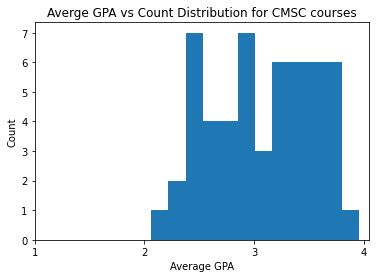

In [ ]:
#average gpa for CMSC courses vs count of that gpa

index = np.asarray([i for i in range(1, 5)])

plt.hist(cmsc_courses_df["average_gpa"], bins=12)
plt.xticks(index)
plt.title("Averge GPA vs Count Distribution for CMSC courses")
plt.xlabel("Average GPA")
plt.ylabel("Count")

plt.show()

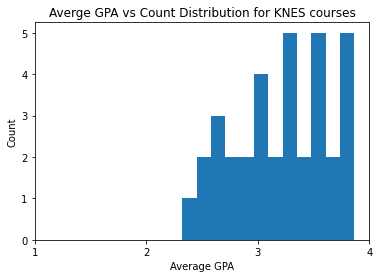

In [ ]:
#average gpa for KNES courses vs count of that gpa

index = np.asarray([i for i in range(1, 5)])

plt.hist(knes_courses_df["average_gpa"], bins=12)
plt.xticks(index)
plt.title("Averge GPA vs Count Distribution for KNES courses")
plt.xlabel("Average GPA")
plt.ylabel("Count")

plt.show()

In [ ]:
#make numpy arrays out of the avg gpa column for both
cmsc_avg_gpa = cmsc_courses_df['average_gpa'].values
knes_avg_gpa = knes_courses_df['average_gpa'].values

print("CMSC Courses count: " + str(len(cmsc_avg_gpa)) + " or " + "KNES Courses count: " + str(len(knes_avg_gpa)))

#cut off 18 entries to be the same sample size
index = [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]

cmsc_avg_gpa2 = np.delete(cmsc_avg_gpa, index)

print("CMSC Courses count: " + str(len(cmsc_avg_gpa2)) + " or " + "KNES Courses count: " + str(len(knes_avg_gpa)))
cmsc_avg_gpa2

CMSC Courses count: 53 or KNES Courses count: 35
CMSC Courses count: 35 or KNES Courses count: 35


array([3.19966395, 2.67261646, 3.46136364, 2.44941702, 2.74684288,
       2.38011222, 2.58496257, 2.3868524 , 3.0144    , 2.74674179,
       2.49150456, 3.14888281, 2.97276786, 3.37327632, 3.06269841,
       2.94630137, 2.88377393, 3.22089235, 2.36666667, 3.69318681,
       2.88934678, 2.94040448, 2.81702712, 2.47474849, 2.36774194,
       2.44232042, 2.53544221, 3.65      , 3.44407407, 2.81368201,
       2.97995227, 3.48181818, 2.88418491, 3.32009569, 2.68901734])

In [ ]:
# run two sample t test
import scipy.stats as stats

print(np.var(cmsc_avg_gpa2), np.var(knes_avg_gpa))
stats.ttest_ind(a=cmsc_avg_gpa2, b=knes_avg_gpa, equal_var=False)


0.14580867979024528 0.18786909196167234


Ttest_indResult(statistic=-3.1433783582687727, pvalue=0.0024893394947493796)

In [ ]:
#function to help get the average gpa for the professor
def calcAvgGPA(prof, df):
  sum = 0
  count = 0
  for i, row in df.iterrows():
    if row['professor'] == prof:
      sum = sum + 4*row['A+'] + 4*row['A'] + 3.7*row['A-'] + 3.3*row['B+'] + 3*row['B'] + 2.7*row['B-'] + 2.3*row['C+'] + 2*row['C'] + 1.7*row['C-'] + 1.3*row['D+'] + 1*row['D'] + .7*row['D-'] + 0*row['F']
      count = count + row['A+'] + row['A'] + row['A-'] + row['B+'] + row['B'] + row['B-'] + row['C+'] + row['C'] + row['C-'] + row['D+'] + row['D'] + row['D-'] + row['F']
  if count == 0:
    return sum
  else:
    return sum / count



In [ ]:
#scatterplot of avg gpa vs average rating for cmsc

scat_cmsc_df = pd.DataFrame()

scat_cmsc_df['name'] = cmsc_prof_df['name']
scat_cmsc_df['average_rating'] = cmsc_prof_df['average_rating']
scat_cmsc_df['total_average_gpa'] = 0

for i, row in scat_cmsc_df.iterrows():
  scat_cmsc_df.at[i, 'total_average_gpa'] = calcAvgGPA(row['name'], cmsc_grades_df)


scat_cmsc_df

,name,average_rating,total_average_gpa
17,Adam Porter,2.5000,3.034218
52,Alexander Barg,2.8750,3.566851
17,Amol Deshpande,2.8889,3.034218
26,Aravind Srinivasan,3.6250,3.105390
50,Ashok Agrawala,1.9000,3.109712
...,...,...,...
58,Erika Melder,5.0000,2.610628
84,Charlotte Avery,4.0000,3.461538
91,Bahar Asgari,5.0000,0.000000
5,Herve Franceschi,4.3333,0.000000


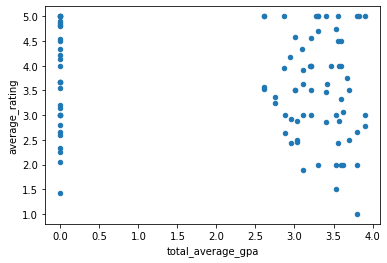

In [ ]:
scat_cmsc_df.plot.scatter(x='total_average_gpa', y='average_rating')


In [ ]:
#scatterplot of avg gpa vs average rating for knes

scat_knes_df = pd.DataFrame()

scat_knes_df['name'] = knes_prof_df['name']
scat_knes_df['average_rating'] = knes_prof_df['average_rating']
scat_knes_df['total_average_gpa'] = 0

for i, row in scat_knes_df.iterrows():
  scat_knes_df.at[i, 'total_average_gpa'] = calcAvgGPA(row['name'], knes_grades_df)


scat_knes_df

,name,average_rating,total_average_gpa
57,Andrew Ginsberg,5.0000,3.934829
77,Ben Hurley,1.0000,3.564583
68,Dennis Vacante,5.0000,2.834697
69,Elizabeth Brown,5.0000,0.000000
69,Evelyn King-Marshall,1.0000,0.000000
72,Jeff Maynor,5.0000,3.934766
59,Jo Zimmerman,5.0000,3.758888
68,Joanne Klossner,5.0000,2.834697
68,Michael Friedman,2.2500,2.834697
80,Rosemary Lindle,4.0000,3.190791


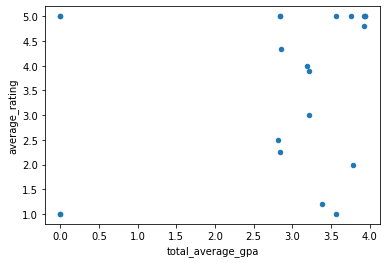

In [ ]:
scat_knes_df.plot.scatter(x='total_average_gpa', y='average_rating')

# Conclusion

This tutorial explores the different statistics of the courses offered at University of Maryland. By using the current data made available on Planet Terp, our tutorial analyzes and manipulates data to provide a visual insight (graphs and plots) and more specific information in addition to what was provided. By using pandas dataframe and many other libraries we were able to create several more variables and models including seperate dataframes for computer science courses and kinesiology, courses that a professor taught and their average ratings, and average GPAs vs count distribution. We then extracted information on average GPAs from classes of these two courses and predicted an average overall GPA using the two sample t test. In the end, we concluded by calculating average ratings of professors and how that correlates to their final class GPA. By providing lots of useful information and data evaluation, this tutorial can help students choose their future classes and can benefit their performance in college.